In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learnig
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [68]:
#carregar dados
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [69]:
# A tabela de treino tem a coluna "Survived", enquanto que a tabela de test não tem.
# Proposta é criar uma base com todas as informações para fazer o tratamento de uma única vez

frame = pd.concat([train_df, test_df])

In [70]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [71]:
# A variável "Cabin" será excluída, pois possui muitos valores ausentes e não há possibilidade de gerar artificialmente
# novos valores.
# A variável "Ticket" também será excluída, pois são valores alfanuméricos sem padrão definido e não são passíveis de 
# ranqueamento
# A variável nome não interfere no resultado, também será excluída

frame.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

## Classficação das variáveis

In [72]:
# PassengerId = variável numérica discreta

#Historgrama
# Fare = variável contínua
# Age = variável contínua

# Gráfico de quantidade em relação a outras variáveis
# Pclass = variável numérica ordinal discreta
# SisSp = variável numérica ordinal discreta
# Parch = variável numérica ordinal discreta

# Gráfico de quantidade em relação a outras variáveis
# Embarked = variável categórica
# Sex = variárvel categórica
# Survived = variável categórica

In [73]:
# Plotar:
# 1 - quantitativo de pessoas por Pclass
# 2 - quantitativo por Sex
# 3 - historgrama da idade
# 4 - quantitativo de irmão e esposos - SibSp
# 5 - quantitativo de pais e filhos - Parch
# 6 - média da Fare por classe
# 7 - quantitativo de Embarked

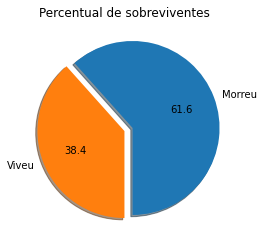

In [74]:
size = frame['Survived'].value_counts()
labels = ['Morreu', 'Viveu']
explode = [0.1, 0]

plt.pie(size, explode=explode, labels=labels, autopct='%1.1f', shadow=True, startangle=270)
plt.title('Percentual de sobreviventes')
plt.show()


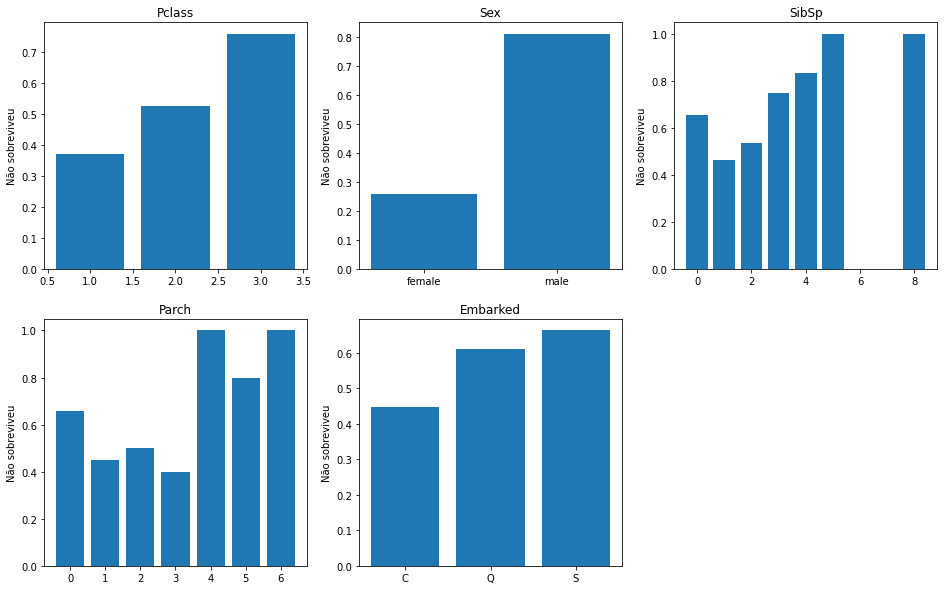

In [75]:
colunas = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
plt.figure(figsize=(16, 10))

for i in range(0, len(colunas)):
    df_plot = frame.groupby([colunas[i], 'Survived']).count()['PassengerId'].rename('count')
    df_plot = (df_plot / df_plot.groupby(level=0).sum()).reset_index()
    df_plot = df_plot[df_plot['Survived'] == 0]

    plt.subplot(2, 3, i+1)
    plt.bar(df_plot[colunas[i]], df_plot['count'])
    plt.title(colunas[i])
    plt.ylabel('Não sobreviveu')

plt.show()

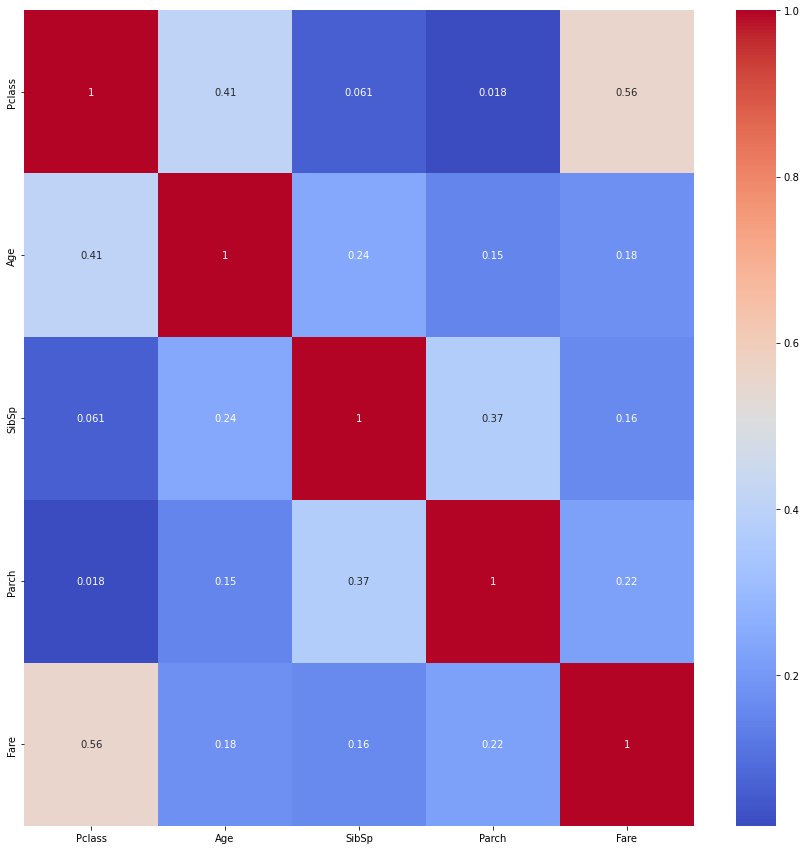

In [76]:
corr_matrix = frame.drop(['Survived', 'PassengerId'], axis=1)
corr_matrix = corr_matrix.corr().abs()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [77]:
frame[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [78]:
frame[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [79]:
frame[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [80]:
frame[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [81]:
frame[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


# Transformação

In [82]:
# Transformar Sex e Embarked em valor numérico
# Porto embarque: C = Cherbourg, Q = Queenstown, S = Southampton

sex = {'male': 0, 'female': 1}
frame['Sex'] = frame['Sex'].map(sex)

port = {'C': 1, 'Q': 2, 'S': 3}
frame['Embarked'] = frame['Embarked'].map(port)

In [83]:
mean_ages = np.zeros((2, 3))

In [84]:
# Completar
# 1 - as idades das pessoas que não possem a informação com a média para a classe e sexo

for i in range(2):
    for j in range(3):
        ages = frame.loc[(frame['Sex'] == i) & (frame['Pclass'] == j+1)]['Age'].mean()
        mean_ages[i, j] = ages

for i in range(2):
    for j in range(3):
        frame.loc[(frame['Age'].isnull()) & (frame['Sex'] == i) & (frame['Pclass'] == j+1), 'Age'] = mean_ages[i, j]

In [85]:
# 2 - o local de embarque para duas pessoas que não apresentam essa informação
# Será utilizada a moda dos valores de embarque.

frame['Embarked'].fillna(frame['Embarked'].dropna().mode()[0], inplace=True)

In [86]:
# 3 - o Fare para uma pessoa não apresenta valor
# Será utilizada a média dos valores considerando local de embarque e a classe.

frame['Fare'].fillna(frame[(frame['Fare'].notnull()) & (frame['Pclass'] == 3) & (frame['Embarked'] == 3)]['Fare'].mean(),
                         inplace=True)

In [87]:
# Testar a normalização/padronização das informações de Age e de Fare
# StandardScaler
scaler = StandardScaler()

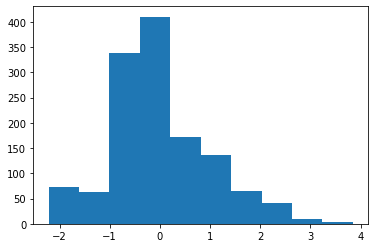

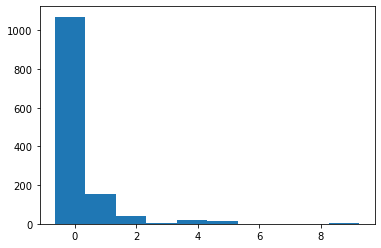

In [88]:
features = ['Age', 'Fare']

for i in features:
    var = np.array(frame[i]).reshape(-1, 1)
    scaler.fit(var)
    frame[i] = scaler.transform(var)
    plt.hist(frame[i])
    plt.show()

In [89]:
df_treino = frame[frame['Survived'].notnull()]
df_teste = frame[frame['Survived'].isnull()]

In [90]:
# Split do DataFrame de treino em duas partes, para validar os modelos

Y = df_treino['Survived']
X = df_treino.drop(['PassengerId', 'Survived'], axis=1)

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)

X_train:  (623, 7)
X_test:  (268, 7)


# Randon Forest

In [92]:
# Primeiro avaliar os resultados do treino, utilizando as métricas para identificar overfitting
# Depois fazer a previsão.
# Técnicas:
# 1-Cross Validation
# 2-ROC
# 3-RMSE - é usado para medir a acurácia na regressão e não na classificação

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

# Fazendo previsão
Y_pred = rf.predict(X_test)


In [93]:
# Cross validation do treino
# Se acurácia das bases de treino e de teste forem próximas, pode indicar que não há overfitting
# Usar a base de treino para fazer a 1ª validação

scores = cross_val_score(rf, X_train, Y_train, cv=3, scoring='accuracy', n_jobs= -1)
print('Cross validation treino: Média = {:.3f} Desvio Padrão = {:.3f}' .format(np.mean(scores), np.std(scores)))

print('----------------------')

#Confusion Matrix
print('Confusion Matrix em Teste')
print(confusion_matrix(Y_test, Y_pred))

print('----------------------')

# Acurácia das previsões em relação ao resultado real
print('Acurácia em Teste: ', accuracy_score(Y_test, Y_pred))

Cross validation treino: Média = 0.828 Desvio Padrão = 0.012
----------------------
Confusion Matrix em Teste
[[128  35]
 [ 25  80]]
----------------------
Acurácia em Teste:  0.7761194029850746


# Gradient Boosting Classifier

In [94]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)
gbc.fit(X_train, Y_train)

# Previsão
Y_pred = gbc.predict(X_test)

In [95]:
scores = cross_val_score(gbc, X_train, Y_train, cv=3, scoring='accuracy', n_jobs= -1)
print('Cross validation treino: Média = {:.3f} Desvio Padrão = {:.3f}' .format(np.mean(scores), np.std(scores)))

print('----------------------')

#Confusion Matrix
print('Confusion Matrix em Teste')
print(confusion_matrix(Y_test, Y_pred))

print('----------------------')

# Acurácia das previsões em relação ao resultado real
print('Acurácia em Teste: ', accuracy_score(Y_test, Y_pred))

Cross validation treino: Média = 0.822 Desvio Padrão = 0.018
----------------------
Confusion Matrix em Teste
[[127  36]
 [ 24  81]]
----------------------
Acurácia em Teste:  0.7761194029850746


# Regressão Logística

In [96]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Fazendo previsão
Y_pred = lr.predict(X_test)

In [97]:
scores = cross_val_score(lr, X_train, Y_train, cv=3, scoring='accuracy', n_jobs= -1)
print('Cross validation treino: Média = {:.3f} Desvio Padrão = {:.3f}' .format(np.mean(scores), np.std(scores)))

print('----------------------')

#Confusion Matrix
print('Confusion Matrix em Teste')
print(confusion_matrix(Y_test, Y_pred))

print('----------------------')

# Acurácia das previsões em relação ao resultado real
print('Acurácia em Teste: ', accuracy_score(Y_test, Y_pred))

Cross validation treino: Média = 0.804 Desvio Padrão = 0.003
----------------------
Confusion Matrix em Teste
[[135  28]
 [ 29  76]]
----------------------
Acurácia em Teste:  0.7873134328358209


# Naive Bayes

In [98]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Fazendo previsão
Y_pred = nb.predict(X_test)

In [99]:
scores = cross_val_score(nb, X_train, Y_train, cv=3, scoring='accuracy', n_jobs= -1)
print('Cross validation treino: Média = {:.3f} Desvio Padrão = {:.3f}' .format(np.mean(scores), np.std(scores)))

print('----------------------')

#Confusion Matrix
print('Confusion Matrix em Teste')
print(confusion_matrix(Y_test, Y_pred))

print('----------------------')

# Acurácia das previsões em relação ao resultado real
print('Acurácia em Teste: ', accuracy_score(Y_test, Y_pred))

Cross validation treino: Média = 0.793 Desvio Padrão = 0.020
----------------------
Confusion Matrix em Teste
[[134  29]
 [ 29  76]]
----------------------
Acurácia em Teste:  0.7835820895522388


# Stochastic Gradient Descent

In [100]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)

# Fazendo previsão
Y_pred = sgd.predict(X_test)

In [101]:
scores = cross_val_score(sgd, X_train, Y_train, cv=3, scoring='accuracy', n_jobs= -1)
print('Cross validation treino: Média = {:.3f} Desvio Padrão = {:.3f}' .format(np.mean(scores), np.std(scores)))

print('----------------------')

#Confusion Matrix
print('Confusion Matrix em Teste')
print(confusion_matrix(Y_test, Y_pred))

print('----------------------')

# Acurácia das previsões em relação ao resultado real
print('Acurácia em Teste: ', accuracy_score(Y_test, Y_pred))

Cross validation treino: Média = 0.655 Desvio Padrão = 0.156
----------------------
Confusion Matrix em Teste
[[ 37 126]
 [  9  96]]
----------------------
Acurácia em Teste:  0.4962686567164179


# Support Vector Machine

In [102]:
svm = SVC()
svm.fit(X_train, Y_train)

# Fazendo previsão
Y_pred = svm.predict(X_test)

In [103]:
scores = cross_val_score(svm, X_train, Y_train, cv=3, scoring='accuracy', n_jobs= -1)
print('Cross validation treino: Média = {:.3f} Desvio Padrão = {:.3f}' .format(np.mean(scores), np.std(scores)))

print('----------------------')

#Confusion Matrix
print('Confusion Matrix em Teste')
print(confusion_matrix(Y_test, Y_pred))

print('----------------------')

# Acurácia das previsões em relação ao resultado real
print('Acurácia em Teste: ', accuracy_score(Y_test, Y_pred))

Cross validation treino: Média = 0.815 Desvio Padrão = 0.018
----------------------
Confusion Matrix em Teste
[[142  21]
 [ 33  72]]
----------------------
Acurácia em Teste:  0.7985074626865671
